**Nom** 1: iker cruz

Nom 2: Marc Martinez

# Repte 4: Fashion CNN

## Enunciat

En aquest repte classficarem les diferents peces de roba fent servir una **Xarxa Neuronal Convolucional**. 

In [1]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.2/992.2 KB 16.6 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
import visualkeras 
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Descarrega i prepara les dades del dataset fashion_mnist. En aquest cas, no 
# transformarem la sortida del model a un vector de 0' i 1's, per tant, haurem 
# d'escollir bé la funció de pèrdua a l'hora de fer l'entrenament de la xarxa.
fashionData = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashionData.load_data()

4422102/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)
uint8


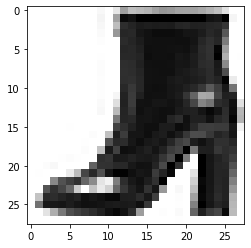

In [4]:
print(x_train.shape)# 60000 imagenes o numeros de 28x28 cada una
print(x_train.dtype)# entero sin signos 8 bits
plt.imshow(x_train[88],cmap = plt.cm.binary)

In [5]:
# Crea una Xarxa Neuronal amb 2 capes Convolucionals de 64 i 128 filtres, de
# mides 7x7 i 3x3. A cada capa li aplicarem la operació MaxPooling 2x2. Afegeix
# també una capa densa de 64 neurones abans de la capa de sortida. Experimenta
# amb les diferents opcions de l'hiperparàmetre padding.


# primer crearem el model de la xarxa neuronal convolucional
model = Sequential()
#comvolution
model.add(Conv2D(filters = 64, kernel_size = (7,7),padding='same', activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D((2,2)))
#pooling
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding='same', activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
#full connection (softmax) aplana las dades per entra en la capa densa
model.add(Dense(10,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 64)                4

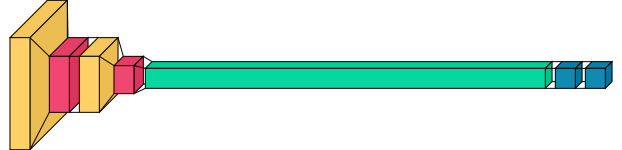

In [6]:
#se a instalado para ver la arquitectura.
visualkeras.layered_view(model)

In [7]:
#normalitzar
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

#transformem les etiquetas a vectors unitaris
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
# Entrena el model i visualitza el resultat de l'evaluació amb les dades de validació

#configuracio
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#entrenament
model.fit(x_train,y_train, batch_size = 100, epochs =5, verbose = 1)

Epoch 1/5
600/600 [==============================] - 16s 6ms/step - loss: 0.4639 - accuracy: 0.8336
Epoch 2/5
600/600 [==============================] - 4s 6ms/step - loss: 0.3043 - accuracy: 0.8911
Epoch 3/5
600/600 [==============================] - 4s 6ms/step - loss: 0.2627 - accuracy: 0.9049
Epoch 4/5
600/600 [==============================] - 4s 6ms/step - loss: 0.2316 - accuracy: 0.9152
Epoch 5/5
600/600 [==============================] - 4s 6ms/step - loss: 0.2071 - accuracy: 0.9230


In [9]:
#evaluacio el model obtingut amb les dades de valicacio
y_lost, y_acc = model.evaluate(x_test,y_test)
print('test accuracy',y_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2563 - accuracy: 0.9066
test accuracy 0.9065999984741211


1/1 [==============================] - 0s 128ms/step
[[4.1750979e-02 2.2450557e-03 2.4700633e-01 6.3678169e-01 1.8914731e-02
  2.6852984e-04 5.1455826e-02 1.3022171e-04 9.2914997e-04 5.1755097e-04]]
Número prediccio: 3
resposta: 2
resposta: Pullover


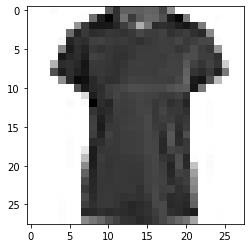

In [10]:
# Creem una llista amb els noms de les peces de roba 
clothes_list = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle", "boot"]

prediccio = model.predict(np.array([x_test[66]]))
print(prediccio)
print(f'Número prediccio: {np.argmax(prediccio)}')
print(f'resposta: {np.argmax(y_test[66])}')
print(f'resposta: {clothes_list[np.argmax(y_test[66])]}')
plt.imshow(x_train[66],cmap = plt.cm.binary)

La capa **BatchNormalization** normalitza les entrades de la capa de manera que la mitja de la seva activació de sortida sigui 0 i la desviació estàndard 1.

La capa **Dropout** ajuda a evitar els error per sobreentrenament (overfitting). Aquesta tècnica es basa en ignorar certs conjunts de neurones de manera aleatòria durant la fase d'entrenament.

In [11]:
# Crea i entrena una CNN amb 4 capes convolucionals de 32, 32, 64 i 128 filtres
# i mida de 3x3. En comptes de la operació MaxPooling, aplicarem les capes
# BatchNormalization i Dropout al 25% a cadascuna d'elles. Configurarem el padding
# de manera que la sortida i l'entrada siguin de la mateixa mida.
#
# Per finalitzar la nostra xarxa, afegirem 2 capes denses de 512 i 128 neurones
# amb les capes BatchNormalization i Dropout al 50% abans de la capa de sortida.


model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', activation = 'relu', input_shape = (28,28,1)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding='same', activation = 'relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding='same',activation = 'relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding='same',activation = 'relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(BatchNormalization())


model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.50))
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.50))
model.add(Dense(10,activation = 'softmax'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 dropout_1 (Dropout)         (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                      

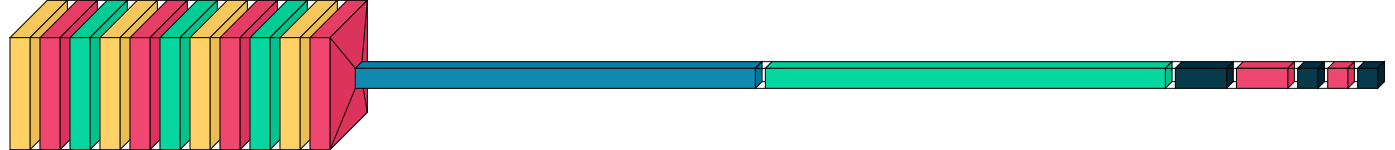

In [12]:
#se a instalado para ver la arquitectura.
visualkeras.layered_view(model)

In [13]:
# Entrena el model i visualitza el resultat de l'evaluació amb les dades de validació

#configuracio
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#entrenament
model.fit(x_train,y_train, batch_size = 100, epochs =5, verbose = 1)

Epoch 1/5
600/600 [==============================] - 28s 45ms/step - loss: 0.8788 - accuracy: 0.7347
Epoch 2/5
600/600 [==============================] - 27s 45ms/step - loss: 0.5326 - accuracy: 0.8156
Epoch 3/5
600/600 [==============================] - 27s 45ms/step - loss: 0.4596 - accuracy: 0.8401
Epoch 4/5
600/600 [==============================] - 27s 45ms/step - loss: 0.4256 - accuracy: 0.8545
Epoch 5/5
600/600 [==============================] - 27s 45ms/step - loss: 0.3856 - accuracy: 0.8653


In [14]:
#evaluacio el model obtingut amb les dades de valicacio
y_lost, y_acc = model.evaluate(x_test,y_test)
print('test accuracy',y_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.2995 - accuracy: 0.8961
test accuracy 0.8960999846458435


1/1 [==============================] - 0s 166ms/step
[[2.7791224e-11 2.0564182e-17 8.7753584e-04 4.0046317e-11 8.6212647e-01
  9.6870841e-24 1.3699593e-01 1.2710969e-22 1.2184694e-12 2.5787155e-25]]
Número prediccio: 4
resposta: 4
resposta: Coat


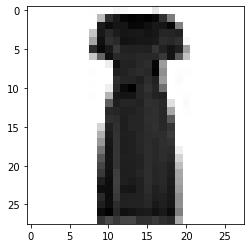

In [15]:

prediccio = model.predict(np.array([x_test[50]]))
print(prediccio)
print(f'Número prediccio: {np.argmax(prediccio)}')
print(f'resposta: {np.argmax(y_test[50])}')
print(f'resposta: {clothes_list[np.argmax(y_test[50])]}')
plt.imshow(x_train[50],cmap = plt.cm.binary)

## Part opcional

Experimenta amb diferents configuracions de xarxa modificant el número de capes, morfologia, hiperparàmetres, etc.